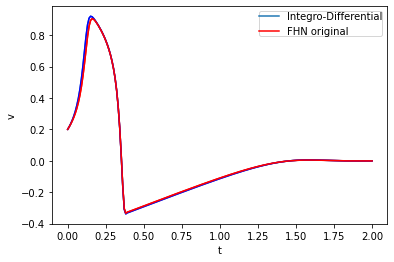

In [2]:
# DSN Project
# Action potential shapes obtained using the original & integro-differential of the FitzHugh-Nagumo model


from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi

N = 200

t0 = 0.0
tf = 2.0

t = np.linspace(t0, tf, N)

h = t[1] - t[0]

v = [None] * N

# FHN original
vorig = [None] * N
w = [None] * N

v[0] = 0.2

# FHN original
vorig[0] = 0.2
w[0] = 0.0

x = 0

def I(i):
    if t[i] < 0.02:
        return 0.0
    else:
        return 0.0

integrandoW = lambda i, s : np.exp(-(t[i] - t[s]) / 2) * v[s]

def integralW(i):
    somatorio = 0
    for j in range(1, i):
        parcela = ( integrandoW(i, j-1) + integrandoW(i, j) ) * h / 2
        somatorio = somatorio + parcela
    return somatorio

dvdt = lambda i : 100 * v[i] * (v[i] - 0.1) * (1 - v[i]) + 100 * I(i) - 100 * integralW(i)

# FHN original
dvdtOrig = lambda i : ( vorig[i] * (vorig[i] - 0.1) * (1 - vorig[i]) - w[i] + I(i) ) / 0.01
dwdtOrig = lambda i : vorig[i] - 0.5 * w[i]

for i in range(1, N):
    v[i] = v[i - 1] + h * dvdt(i - 1)
    # FHN original
    vorig[i] = vorig[i - 1] + h * dvdtOrig(i - 1)
    w[i] = w[i - 1] + h * dwdtOrig(i - 1)

plt.plot(t, v, label='Integro-Differential')
plt.plot(t, vorig, 'r-', label='FHN original')
plt.legend()
leg = plt.legend(loc ="upper right", borderpad=0.001);
plt.plot(t, v, 'b-', t, vorig, 'r-')
plt.xlabel('t')
plt.ylabel('v')
plt.show()


# In[ ]:




